Problem 2: Finding the Optimal k Using Leave-One-Out Cross
Validation
 In this task, you will use the K-Nearest Neighbors (KNN) classifier to classify handwritten digits from the
 MNIST dataset. The goal is to determine:
 1. The optimal number of neighbors (k) for the KNN classifier.
 2. Evaluate the classifier’s performance using leave-one-out cross-validation (LOO CV).

 You will:
 1. Download and preprocess the MNIST dataset (use 10% of the dataset for faster experimentation).
 2. Implement leave-one-out cross-validation to evaluate the KNN classifier for various values of k.
 3. Determine the optimal value of k based on LOO CV results.
 
 Steps to Follow:
 1. Preprocess the MNIST dataset: Normalize the pixel values (e.g., divide by 255 to scale between
 0 and 1) and select a random 10% subset of the dataset.
 2. KNN Classifier: Use the KNeighborsClassifier from sklearn.neighbors. Iterate over different
 values of k, specifically k = 1,2,...,10.
 3. Leave-One-Out Cross-Validation, for each value of k, perform LOO CV:
    <p>• Train the KNN model on n−1 data points, where n is the total number of samples.
    <p>• Test the model on the single data point left out.
    <p>• Repeat this for all data points and compute the overall accuracy.
 4. Determine the Optimal k:
    <p>• Calculate the accuracy for each value of k.
    <p>• Determine the value of k with the highest accuracy.
 5. Plot:
    <p>• Plot the accuracy for each value of k based on the LOO CV results.

In [10]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [11]:
# Load MNIST dataset and normalize
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"] / 255, mnist["target"]


# Select a random 10% subset of the dataset
part = int(0.1 * len(mnist["data"]))
subset_indices = np.random.choice(X.index, size=part, replace=False)
X_subset = X.loc[subset_indices]
y_subset = y.loc[subset_indices]

LOO CV for each k value:

In [ ]:
neighbours = 10

accuracies = {k: 0 for k in range(1, neighbours+1)}
for k in range(1, neighbours+1):
    hits = 0
    for i in range(len(X_subset)):

        # X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=1)

        X_test, X_train = X_subset.iloc[[i]], X_subset.drop(X_subset.index[i])
        y_test, y_train = y_subset.iloc[[i]], y_subset.drop(y_subset.index[i])
        # print(f"X_train: {len(X_train)}, X_test: {len(X_test)}")

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        
        y_pred = knn.predict(X_test)

        # We know that the test size is 1 (either hits or not [0, 1]), so we can just add the accuracy to the hits, simpler calculations
        hits += accuracy_score(y_test, y_pred)
        # print(hits)

    accuracies[k] = hits / len(X_subset)
    print(f"Accuracy for k={k}: {accuracies[k]}")


Accuracy for k=1: 0.9435714285714286
Accuracy for k=2: 0.9321428571428572
Accuracy for k=3: 0.9447142857142857
Accuracy for k=4: 0.9427142857142857
Accuracy for k=5: 0.9451428571428572
Accuracy for k=6: 0.9431428571428572
Accuracy for k=7: 0.9431428571428572
Accuracy for k=8: 0.9425714285714286
Accuracy for k=9: 0.9404285714285714
Accuracy for k=10: 0.9371428571428572


In [25]:
best_acc = max(accuracies.values())
best_k = [key for key, val in accuracies.items() if val == best_acc]
print(f"Best accuracy: {best_acc} for k={best_k}")

Best accuracy: 0.9451428571428572 for k=[5]


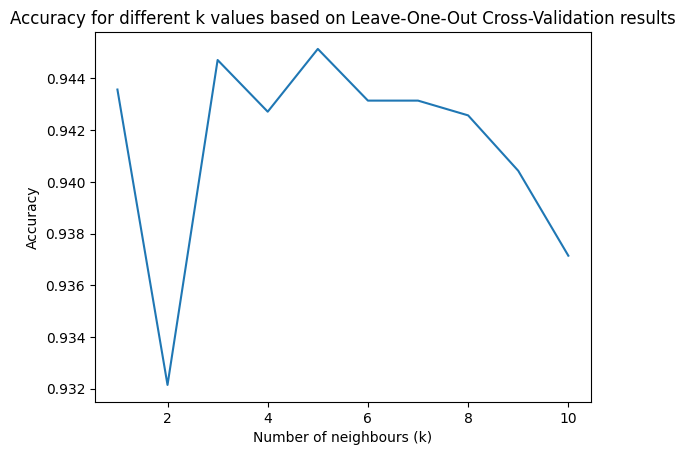

In [26]:
plt.plot(accuracies.keys(), accuracies.values())
plt.title("Accuracy for different k values based on Leave-One-Out Cross-Validation results")
plt.xlabel('Number of neighbours (k)')
plt.ylabel('Accuracy')
plt.show()

<b> Summary:</b>
<p> In this case, from what we can see on the plot - based on Leave-One-Out Cross-Validation results - we can determine that the best value of neighbors in KNN Classifier would be k = 5, but we are also achieving good results with k = 1 and k = 3.